# Purpose: Developing a Predictive Model that can predict the country of destination for new Airbnb users based on their personal attributes and web session records.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

# # Set figure aesthetics
# sns.set_style("white", {'ytick.major.size': 10.0})
# sns.set_context("poster", font_scale=1.1)

## Data Exploration
Is there any mistakes in the data?

Does the data have peculiar behavior?

Do I need to fix or remove any of the data to be more realistic?

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

In [3]:
train_users.shape

(213451, 16)

In [4]:
train_users.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
train_users.tail(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [6]:
test_users.shape

(62096, 15)

In [7]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [8]:
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [9]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Remove ID's since now we are not interested in making predictions
users.drop('id',axis=1, inplace=True)

users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Missing Data

After reviewing the dataframe, we have found that for gender colume, it is expressed as '-unknown-' for those that are null, therefore, we need a transformation

In [10]:
users.gender.replace('-unknown-', np.nan, inplace=True)

In [11]:
(users.isnull().sum() / users.shape[0])*100


date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         67.733998
gender                     46.990169
age                        42.412365
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.208335
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination        22.535538
dtype: float64

Colume 'date_first_booking' is not included at the tests users, and therefore, we won't need it at the modeling part.

We mainly focus on NaN-values in the age and gender

In [12]:
print("Just for the sake of curiosity, we have", 
      int((train_users.date_first_booking.isnull().sum() / train_users.shape[0]) * 100), 
      "% of missing values at date_first_booking in the training data")

Just for the sake of curiosity, we have 58 % of missing values at date_first_booking in the training data


In [13]:
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

There is some inconsistency in the age of some users as we can see above, std. as 142 and max.age is 2014. It could be because the age inpout field was polluted or there was some mistakes handling the data.

In [14]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


According to Airbnb elligibility terms, users above 18 are not allowed to book travled on their own behalf.
Also we can assume age bigger than 122 are unrealistic.

In [15]:
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [16]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [17]:
# We simply remove ages below 13 as unkown as well as those above 122
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

## Data Types
We need to transform certain columns into categorical features and date-related columns into date-format:

In [18]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [19]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [20]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


## Visualizition 
visulization is the perfect way for us to visulize our data as well as spot errors & outliers

### Gender

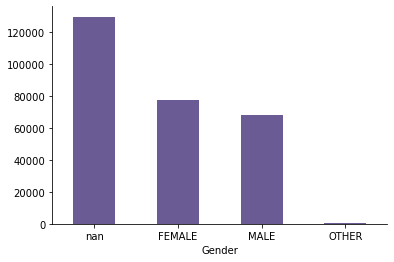

In [21]:
users.gender.value_counts(dropna=False).plot(kind='bar', color='#6B5B95', rot=0)
plt.xlabel('Gender')
sns.despine()

As we've seen before at this plot we can see the ammount of missing data in perspective(null values). Also, we can see that there is a slight difference between user gender.

We now would like to explore the gender preferences when travelling:

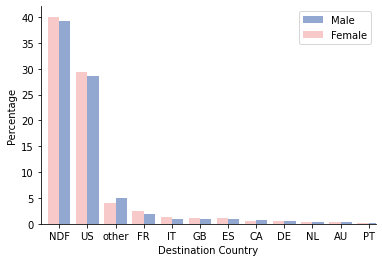

In [22]:
FEMALE = sum(users['gender'] == 'FEMALE')
MALE = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / FEMALE * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / MALE * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#92A8D1', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#F7CAC9', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

#There is not great differences between those two.

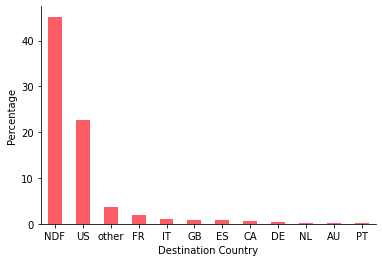

In [23]:

destination_percentage = users.country_destination.value_counts() / users.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

#Most of the users do not make reservations. therefore, we now can try visulize it without 'NDF' and 'US' and see the preferences of travalling abroad.

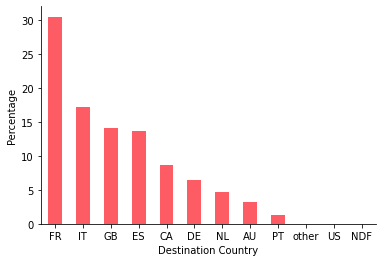

In [24]:
data_without_NDF = users[users['country_destination']!='NDF']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='US']
data_without_NDF2= data_without_NDF1[data_without_NDF1['country_destination']!='other']

destination_percentage = data_without_NDF2.country_destination.value_counts() / data_without_NDF2.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

## Age

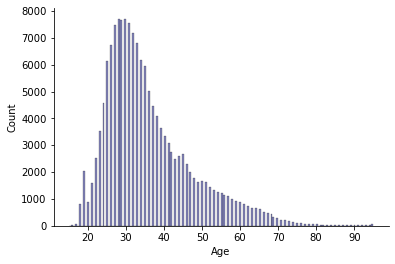

In [25]:
sns.histplot(users.age.dropna(), color='#5B5EA6')
plt.xlabel('Age')
sns.despine()

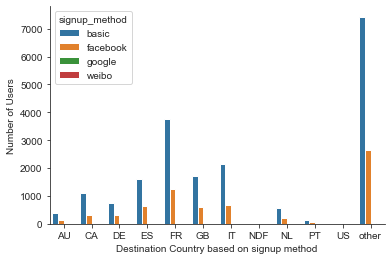

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup method')
plt.ylabel('Number of Users')
sns.despine()

The basic sign-up method is the most popular one, facebook method being the second

## Dates and days 

<AxesSubplot:>

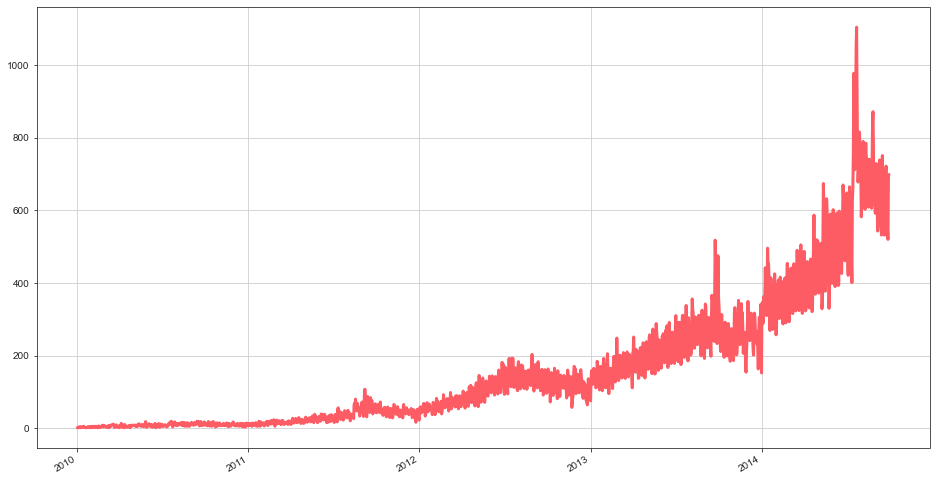

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster")
users.date_account_created.value_counts().plot(kind='line',  color='#FD5C64')

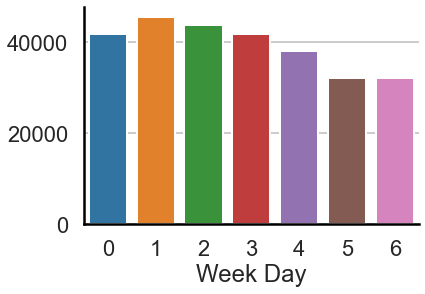

In [28]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

The local minimums where the Saturdays(where the people use less the Internet), and it's usually to hit a maximum at Mondays!